# Basic Operations

In this tutorial, we introduce the basic operations of proxies with `cfr`.

In [1]:
%load_ext autoreload
%autoreload 2

import cfr
print(cfr.__version__)

0.6.0


## Load the PAGES2k network

In [2]:
pdb = cfr.ProxyDatabase().fetch('PAGES2kv2')
pdb

Once the `ProxyDatabase` is created, we have `ProxyDatabase.records` as a dictionary of `ProxyRecord`.

In [3]:
i = 0
for pid, pobj in pdb.records.items():
    print(pid, pobj)
    i += 1
    if i >= 5:
        break

NAm_153 <cfr.proxy.ProxyRecord object at 0x2b8676460>
Asi_245 <cfr.proxy.ProxyRecord object at 0x2b8676220>
NAm_165 <cfr.proxy.ProxyRecord object at 0x2b8676eb0>
Asi_178 <cfr.proxy.ProxyRecord object at 0x2b8676ee0>
Asi_174 <cfr.proxy.ProxyRecord object at 0x2b8676e80>


## Slice a `ProxyDatabase` by index

When the index is a `slice`, we get a subset of the `ProxyDatabase`:

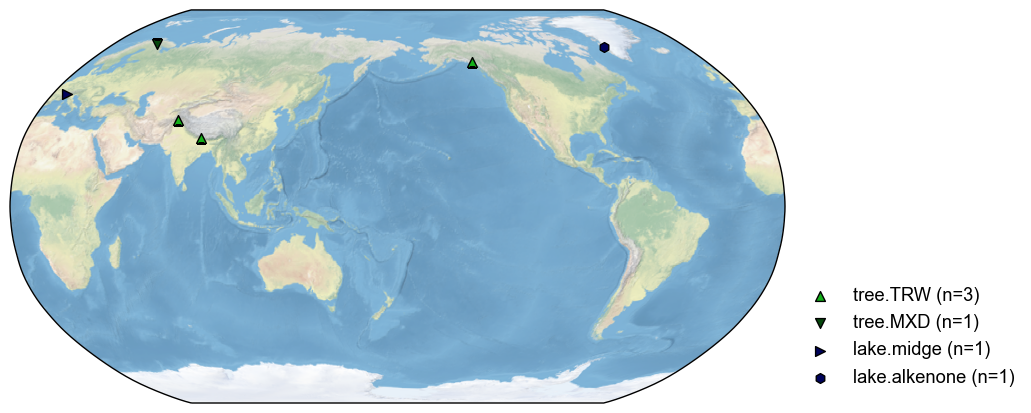

In [4]:
fig, ax = pdb[4:10].plot()

When the index is an `int`, we get a `ProxyRecord` instead:

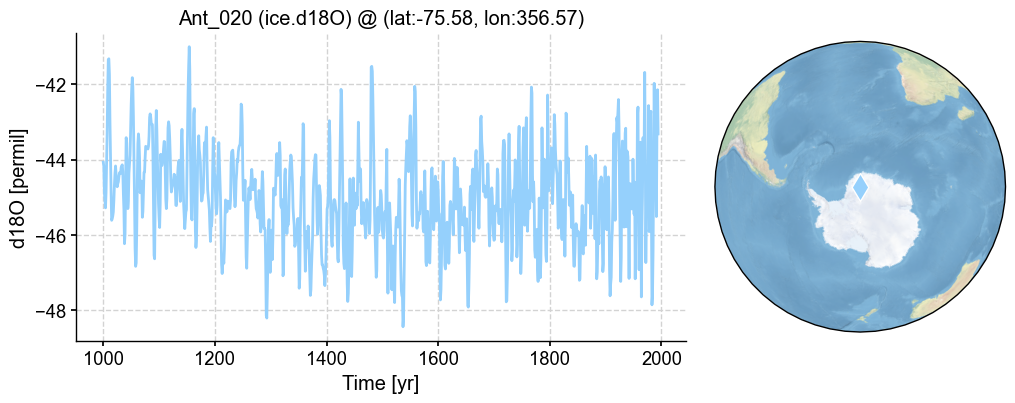

In [5]:
fig, ax = pdb[100].plot()


When the index is a proxy ID in `str`, we get a `ProxyRecord` as well:

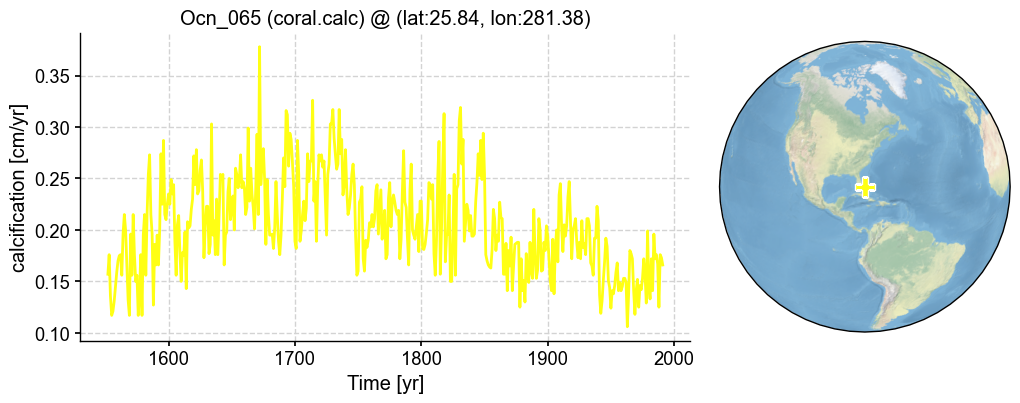

In [6]:
fig, ax = pdb['Ocn_065'].plot()

## Slice a `ProxyRecord`

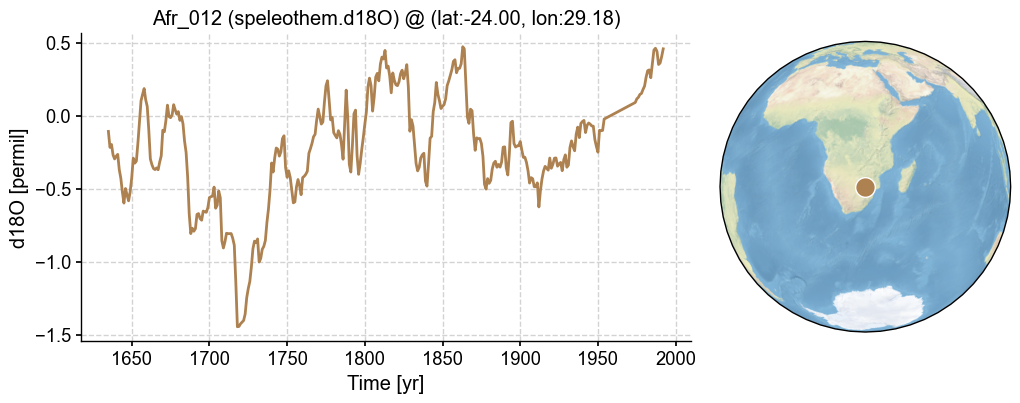

In [7]:
pobj = pdb.records['Afr_012']
fig, ax = pobj.plot()

We may slice the record using the `slice()` method:

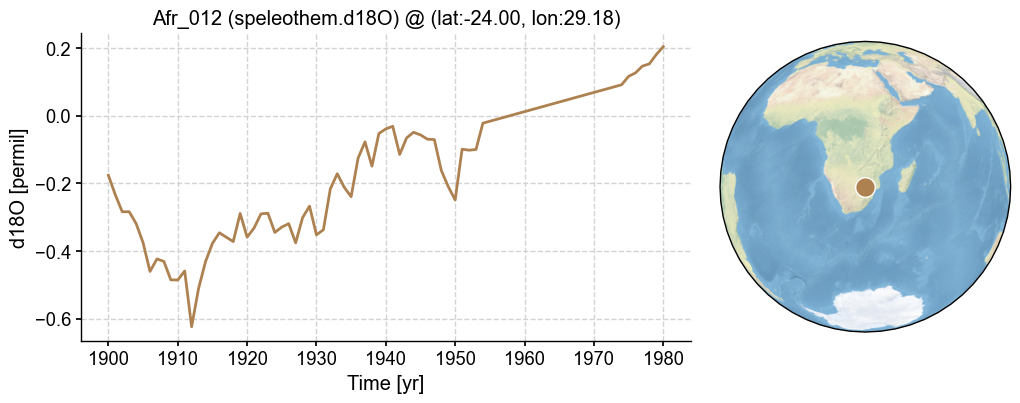

In [13]:
fig, ax = pobj.slice([1900, 1980]).plot()

We may also use a slice with `str` to indicate a specific year range:

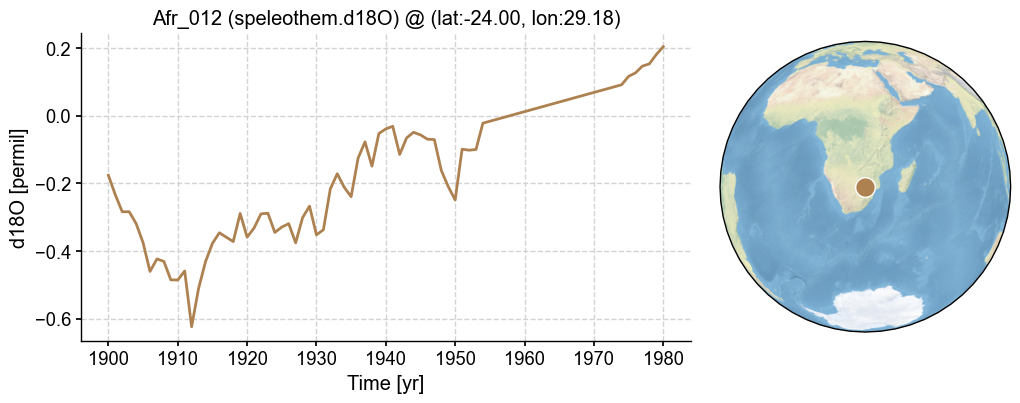

In [15]:
fig, ax = pobj['1900':'1980'].plot()

... or even add a step:

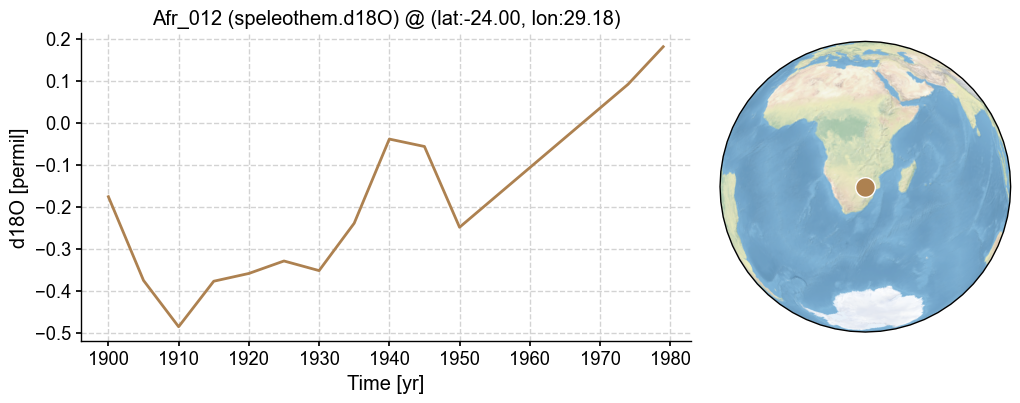

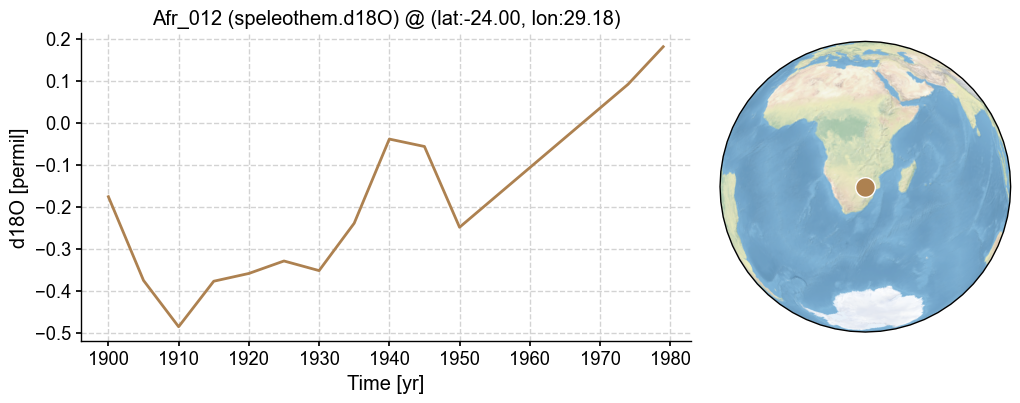

In [16]:
fig, ax = pobj['1900':'1980':'5'].plot()
fig, ax = pobj['1900':'1980':5].plot()

## Add several `ProxyRecord`s together to form a `ProxyDatabase`

In [17]:
pdb_sub = pdb.records['NAm_153'] + pdb.records['Afr_005']
pdb_sub.records

{'NAm_153': <cfr.proxy.ProxyRecord at 0x2bc098ca0>,
 'Afr_005': <cfr.proxy.ProxyRecord at 0x2bd3a6e80>}

## Add a list of `ProxyRecord`s into an existing `ProxyDatabase`

In [18]:
pobj_list = list(pdb.records.values())[:5]
pdb_sub = cfr.ProxyDatabase()

for pobj in pobj_list:
    pdb_sub += pobj
    
pdb_sub.records

{'NAm_153': <cfr.proxy.ProxyRecord at 0x2bcf14940>,
 'Asi_245': <cfr.proxy.ProxyRecord at 0x2bcf14cd0>,
 'NAm_165': <cfr.proxy.ProxyRecord at 0x2bd2ee640>,
 'Asi_178': <cfr.proxy.ProxyRecord at 0x2bd2ee4f0>,
 'Asi_174': <cfr.proxy.ProxyRecord at 0x2b8676e80>}

## Merge several `ProxyDatabase`s

In [19]:
pdb_sub1 = cfr.ProxyDatabase()
pobj_list = list(pdb.records.values())[:5]
pdb_sub1 += pobj_list
        
pdb_sub2 = cfr.ProxyDatabase()
pobj_list = list(pdb.records.values())[10:15]
pdb_sub2 += pobj_list
        
pdb_sub = pdb_sub1 + pdb_sub2
pdb_sub.records

{'NAm_153': <cfr.proxy.ProxyRecord at 0x2bd2eef40>,
 'Asi_245': <cfr.proxy.ProxyRecord at 0x2bd2eefa0>,
 'NAm_165': <cfr.proxy.ProxyRecord at 0x2bd2ee940>,
 'Asi_178': <cfr.proxy.ProxyRecord at 0x2bcf256a0>,
 'Asi_174': <cfr.proxy.ProxyRecord at 0x2bd2d73a0>,
 'NAm_102': <cfr.proxy.ProxyRecord at 0x2b8676cd0>,
 'NAm_046': <cfr.proxy.ProxyRecord at 0x2b8676d30>,
 'Ocn_065': <cfr.proxy.ProxyRecord at 0x2b8676d60>,
 'Asi_242': <cfr.proxy.ProxyRecord at 0x2b8676c10>,
 'Asi_170': <cfr.proxy.ProxyRecord at 0x2b8676ca0>}

## Substract a list of `ProxyRecord`s from a `ProxyDatabase`

In [20]:
pdb_left = pdb_sub - pdb_sub1
pdb_left.records

{'NAm_102': <cfr.proxy.ProxyRecord at 0x2bd2ee550>,
 'NAm_046': <cfr.proxy.ProxyRecord at 0x2bd2eeb80>,
 'Ocn_065': <cfr.proxy.ProxyRecord at 0x2bd2eeeb0>,
 'Asi_242': <cfr.proxy.ProxyRecord at 0x2bd2eec70>,
 'Asi_170': <cfr.proxy.ProxyRecord at 0x2bcfd9730>}

If the `ProxyRecord` to remove does not exist, a warning will prompt.

In [22]:
pdb_left = pdb_sub - pdb.records['Ocn_065'] - pdb.records['NAm_153']
pdb_left.records

{'Asi_245': <cfr.proxy.ProxyRecord at 0x2bd2f2dc0>,
 'NAm_165': <cfr.proxy.ProxyRecord at 0x2bd2f2e50>,
 'Asi_178': <cfr.proxy.ProxyRecord at 0x2bd2f2ee0>,
 'Asi_174': <cfr.proxy.ProxyRecord at 0x2bd2f2f70>,
 'NAm_102': <cfr.proxy.ProxyRecord at 0x2bd2fb040>,
 'NAm_046': <cfr.proxy.ProxyRecord at 0x2bd2fb0d0>,
 'Asi_242': <cfr.proxy.ProxyRecord at 0x2bd2fb160>,
 'Asi_170': <cfr.proxy.ProxyRecord at 0x2bd2fb1f0>}

## Substract a `ProxyDatabase` from another

In [23]:
pdb_right = pdb_sub - pdb_left
pdb_right.records

{'NAm_153': <cfr.proxy.ProxyRecord at 0x2bd2eed90>,
 'Ocn_065': <cfr.proxy.ProxyRecord at 0x2bd2fb340>}

## Filter a `ProxyDatabase`

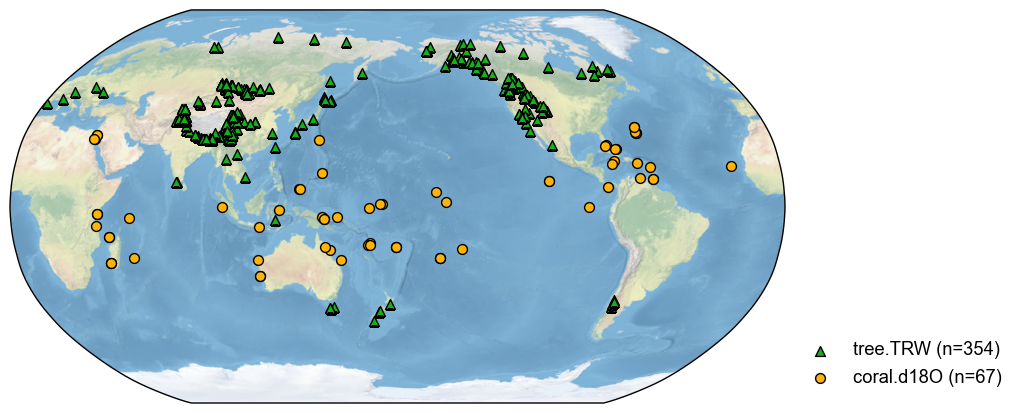

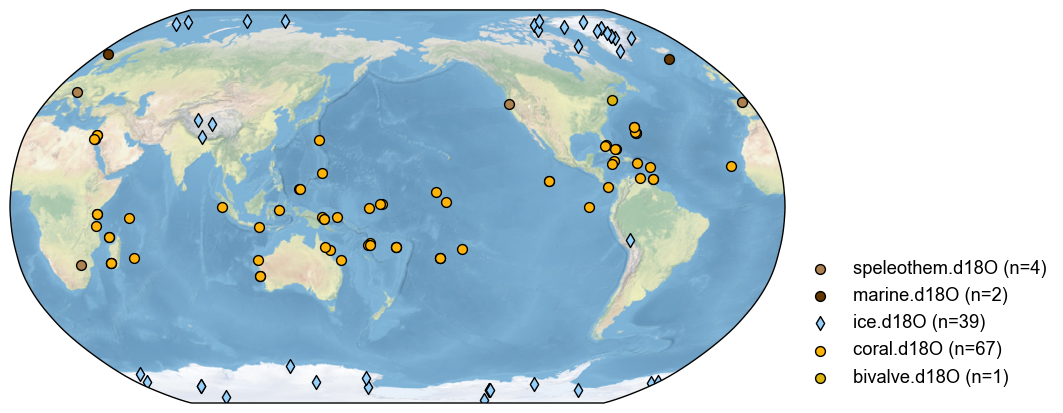

In [24]:
# by proxy type
pdb_TRW = pdb.filter(by='ptype', keys=['tree.TRW', 'coral.d18O'])
fig, ax = pdb_TRW.plot(plot_count=False)

pdb_TRW = pdb.filter(by='ptype', keys=['d18O'])
fig, ax = pdb_TRW.plot(plot_count=False)

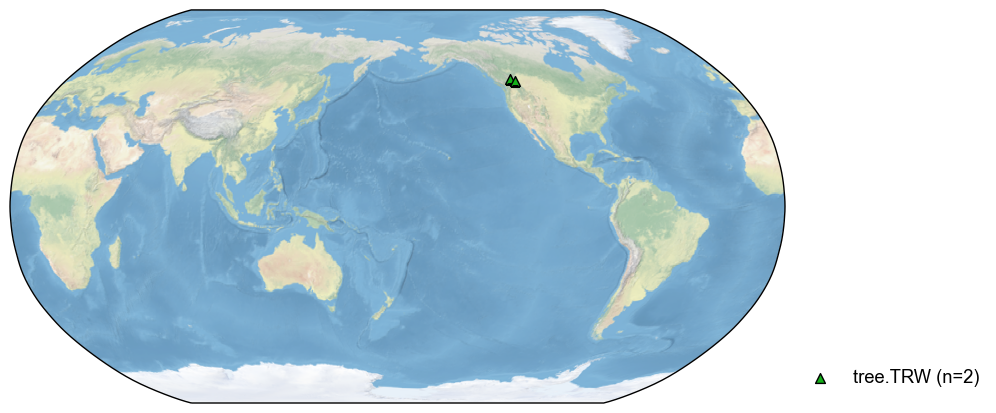

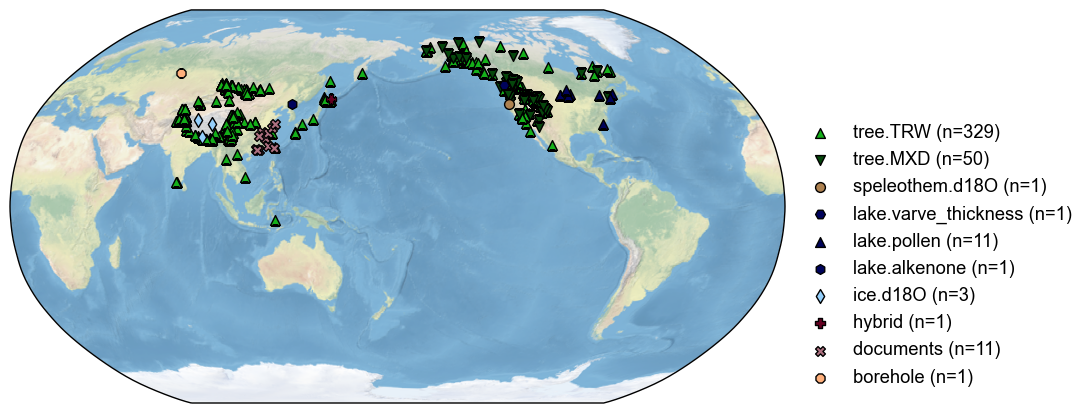

In [25]:
# by proxy id
pdb_NAm = pdb.filter(by='pid', keys=['NAm_153', 'NAm_154'])
fig, ax = pdb_NAm.plot(plot_count=False)

pdb_NAm_Asi = pdb.filter(by='pid', keys=['NAm', 'Asi'])
fig, ax = pdb_NAm_Asi.plot(plot_count=False)

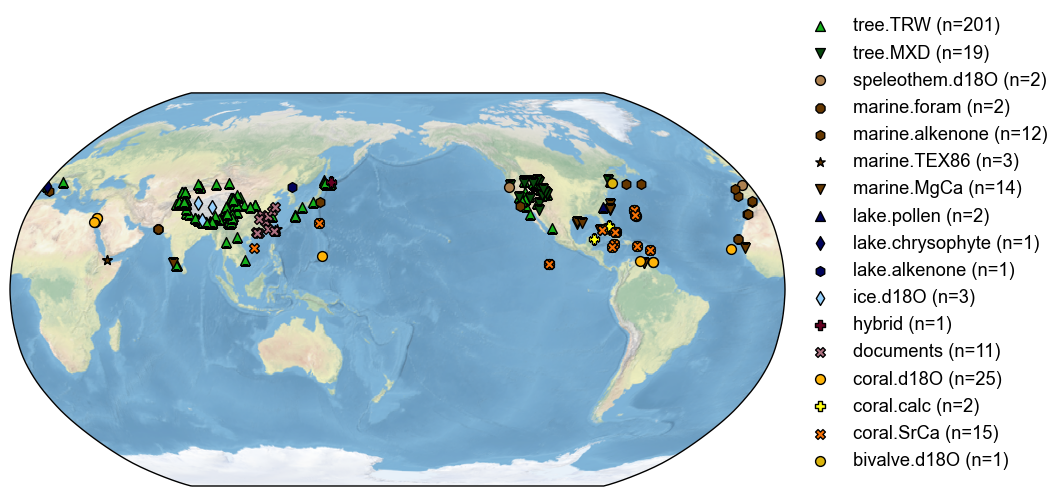

In [26]:
# by latitude
pdb_sub = pdb.filter(by='lat', keys=[10, 45])
fig, ax = pdb_sub.plot(plot_count=False)

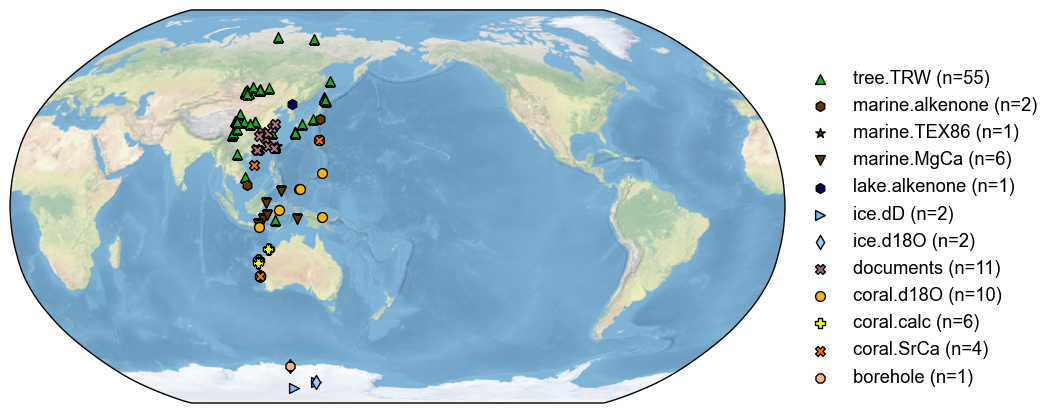

In [27]:
# by longitude
pdb_sub = pdb.filter(by='lon', keys=[100, 145])
fig, ax = pdb_sub.plot(plot_count=False)

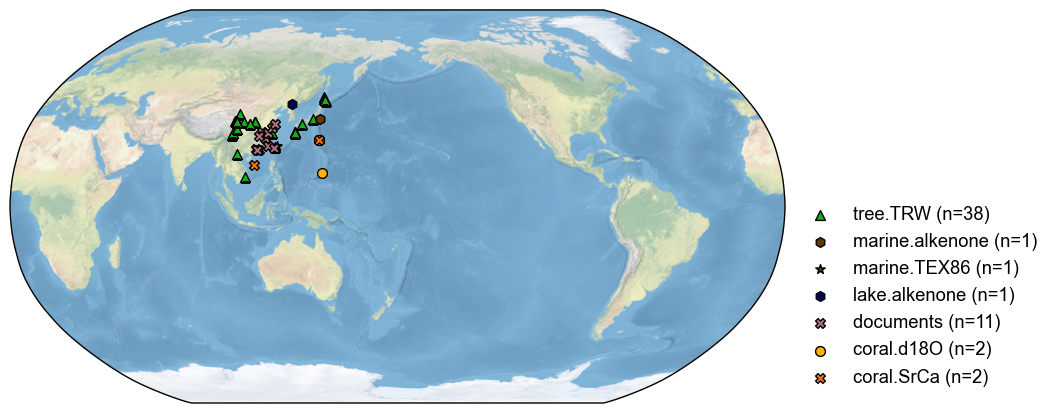

In [28]:
# by location in a square
pdb_sub = pdb.filter(by='loc-square', keys=[10, 45, 100, 145])
fig, ax = pdb_sub.plot(plot_count=False)

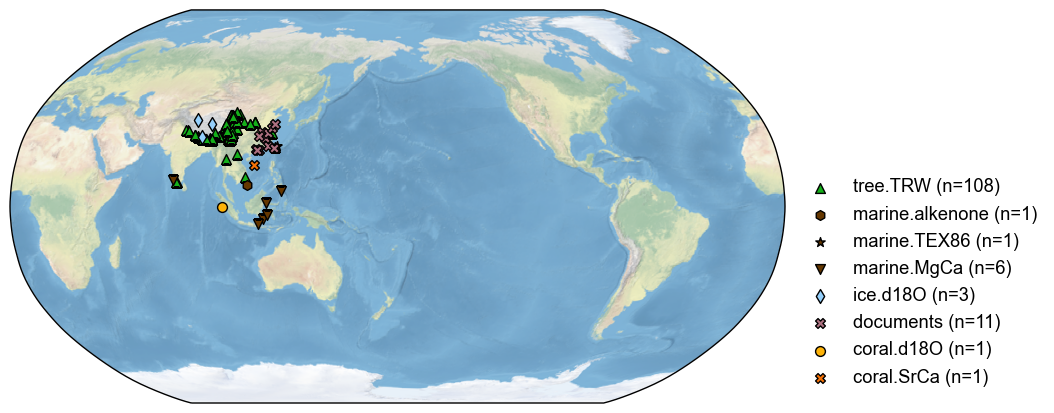

In [29]:
# by location in a circle
pdb_sub = pdb.filter(by='loc-circle', keys=[15, 100, 3000])
fig, ax = pdb_sub.plot(plot_count=False)

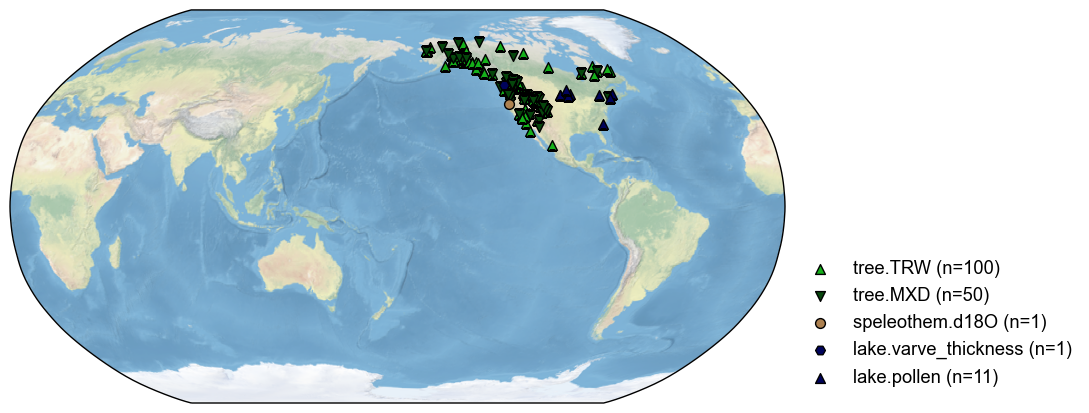

In [31]:
# by tag

# make tags
for pid, pobj in pdb.records.items():
    if 'NAm' in pid:
        pobj.tags = {'selected N'}

pdb_sub = pdb.filter(by='tag', keys=['selected N'])
fig, ax = pdb_sub.plot(plot_count=False)

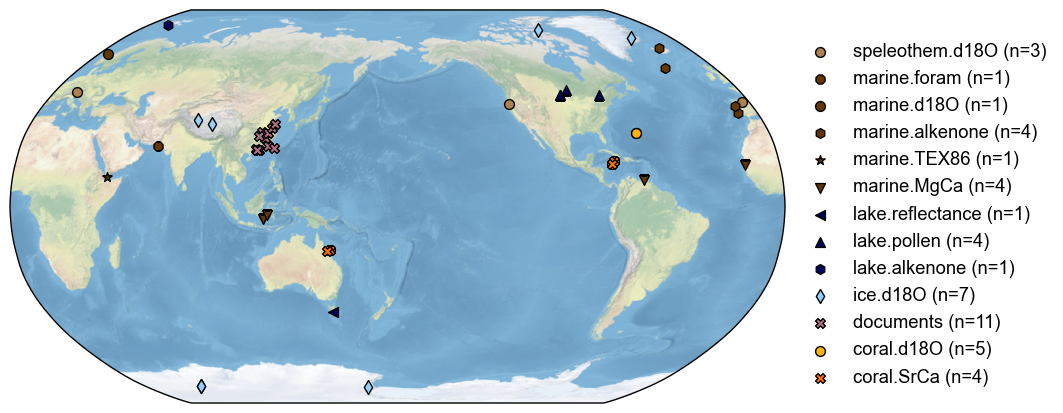

In [34]:
## by resolution
pdb_sub = pdb.filter(by='dt', keys=[1.1, 10])
fig, ax = pdb_sub.plot(plot_count=False)

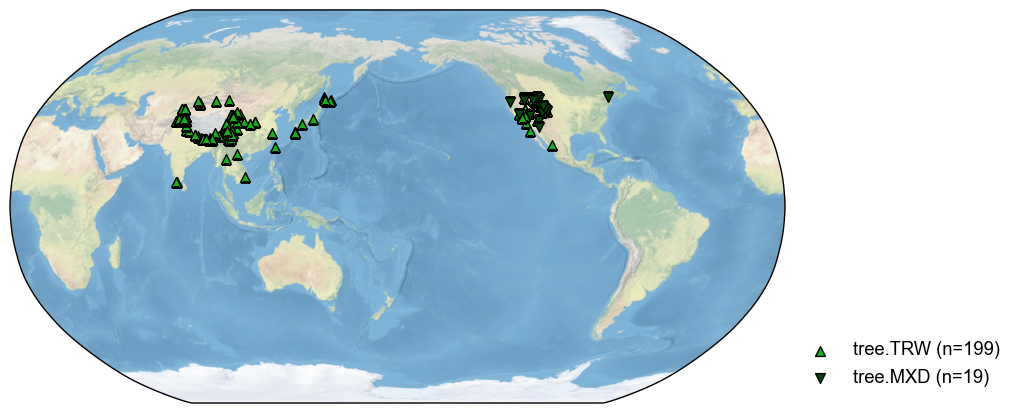

In [35]:
# combination
pdb_sub = pdb.filter(by='pid', keys=['NAm', 'Asi']).filter(by='ptype', keys=['tree.TRW', 'tree.MXD']).filter(by='lat', keys=[10, 45])
fig, ax = pdb_sub.plot(plot_count=False)